In [19]:
# 1. Install Dependencies and Setup
!pip install tensorflow opencv-python matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import os
import cv2
import imghdr
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report  # Importing confusion_matrix and classification_report


In [22]:
# 2. Remove dodgy images
data_dir = r"D:\Pattern Recognition FInal Project\Multi-class Weather Dataset"
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            

Found 1115 files belonging to 4 classes.


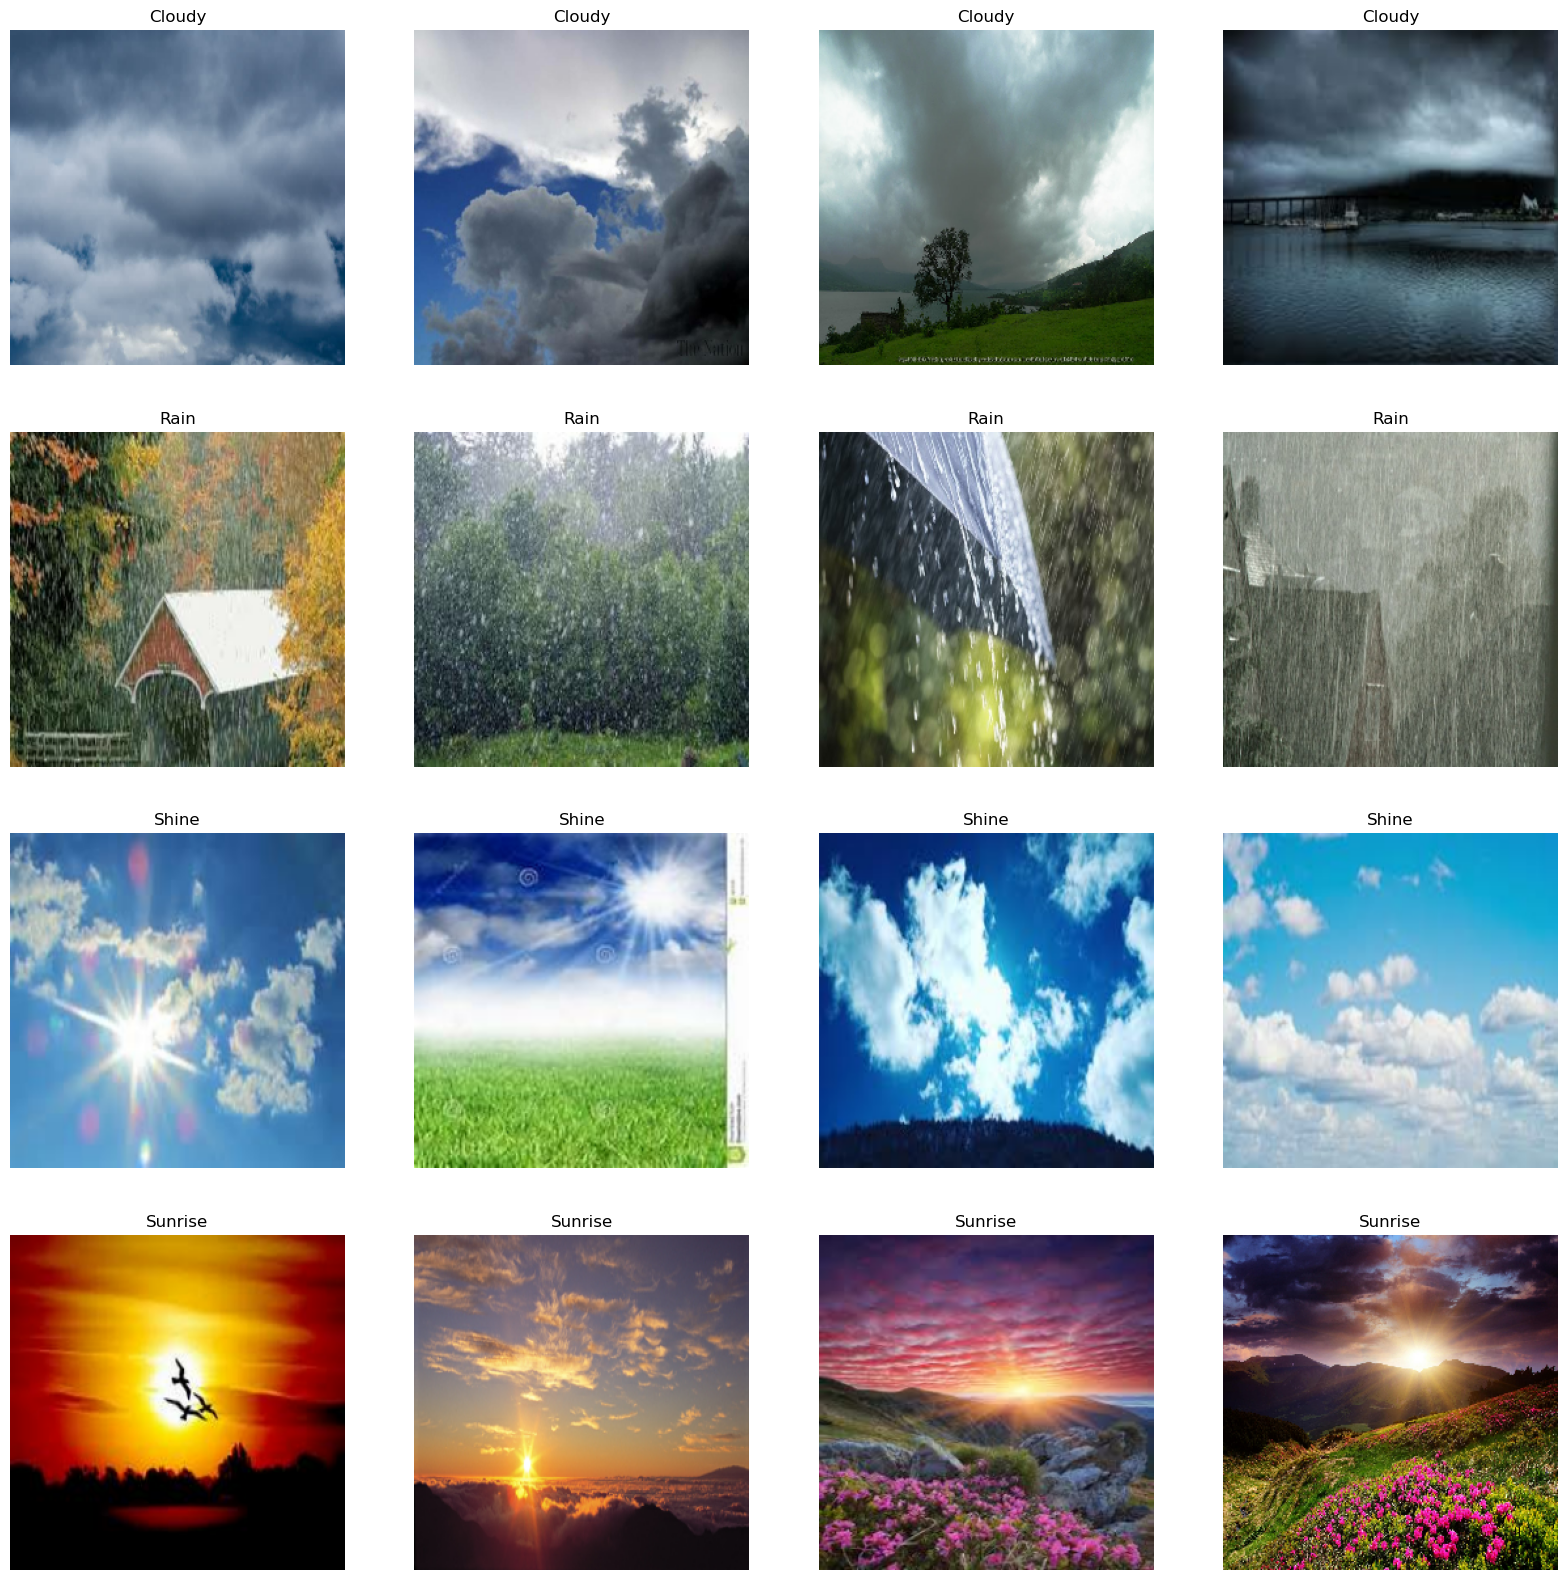

In [26]:
# 3. Load Data
data = tf.keras.utils.image_dataset_from_directory(data_dir)
class_names = data.class_names  # Get class names

# Create a dictionary to store images from each class
class_images = {class_name: [] for class_name in class_names}

# Iterate over the dataset and collect images from each class
for X_batch, y_batch in data:
    for image, label in zip(X_batch, y_batch):
        class_name = class_names[label]
        if len(class_images[class_name]) < 4:  # Display only 4 images per class
            class_images[class_name].append(image)

# Display images from all classes
fig, ax = plt.subplots(nrows=len(class_names), ncols=4, figsize=(20, 20))

for i, class_name in enumerate(class_names):
    for j, img in enumerate(class_images[class_name]):
        ax[i, j].imshow(img.numpy().astype(int))  # Convert EagerTensor to NumPy array
        ax[i, j].set_title(class_name)
        ax[i, j].axis("off")

plt.show()


In [27]:
# 4. Scale Data
data = data.map(lambda x, y: (x / 255, y))
data.as_numpy_iterator().next()


(array([[[[2.58823544e-01, 3.96078438e-01, 5.60784340e-01],
          [2.56119788e-01, 3.93374681e-01, 5.58080554e-01],
          [2.54901975e-01, 3.92156869e-01, 5.56862772e-01],
          ...,
          [6.15548432e-01, 6.50842547e-01, 7.09666073e-01],
          [6.05675578e-01, 6.44623160e-01, 7.02228844e-01],
          [5.92156887e-01, 6.39215708e-01, 6.94117665e-01]],
 
         [[2.57268697e-01, 3.94523591e-01, 5.59229493e-01],
          [2.55636960e-01, 3.92891854e-01, 5.57597756e-01],
          [2.54151881e-01, 3.91406775e-01, 5.56112647e-01],
          ...,
          [6.11633956e-01, 6.46928072e-01, 7.05751598e-01],
          [6.01493895e-01, 6.40441477e-01, 6.98047161e-01],
          [5.89047194e-01, 6.36106014e-01, 6.91007972e-01]],
 
         [[2.54924953e-01, 3.92179847e-01, 5.56885719e-01],
          [2.54909068e-01, 3.92163992e-01, 5.56869864e-01],
          [2.53021181e-01, 3.90276074e-01, 5.54981947e-01],
          ...,
          [6.05733395e-01, 6.41027510e-01, 6.9985

In [28]:
# 5. Split Data
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [29]:
# 6. Build Deep Learning Model
num_classes = len(os.listdir(data_dir))  # Number of classes in the dataset

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
# 7. Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train, validation_data=val, epochs=20)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.4193 - loss: 1.6003 - val_accuracy: 0.7098 - val_loss: 0.7035
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.7545 - loss: 0.5617 - val_accuracy: 0.7768 - val_loss: 0.6488
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.8554 - loss: 0.3883 - val_accuracy: 0.8750 - val_loss: 0.3798
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.8722 - loss: 0.3282 - val_accuracy: 0.9152 - val_loss: 0.2607
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.9197 - loss: 0.2458 - val_accuracy: 0.9152 - val_loss: 0.2561
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.9365 - loss: 0.1784 - val_accuracy: 0.9420 - val_loss: 0.1945
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.9405 - loss: 0.1604 - val_accuracy: 0.9152 - val_loss: 0.2204
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.9586 - loss: 0.1340 - val_accuracy: 0.

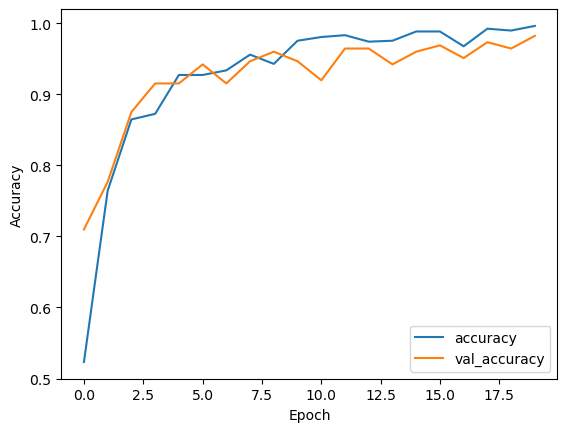

In [31]:
# 8. Plot Performance
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [32]:
# 9. Evaluate
loss, accuracy = model.evaluate(test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

# 10. Confusion Matrix and Classification Report
y_true = []
y_pred = []

for X_batch, y_batch in test:
    y_true.extend(y_batch.numpy())
    y_pred.extend(np.argmax(model.predict(X_batch), axis=-1))

conf_mat = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred, target_names=class_names)  # Include class names in the report

print("Confusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(class_report)



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9896 - loss: 0.0452
Test loss: 0.08840876072645187
Test accuracy: 0.9791666865348816
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Confusion Matrix:
[[32  0  0  0]
 [ 0 22  0  0]
 [ 0  2 15  0]
 [ 0  0  1 24]]

Classification Report:
              precision    recall  f1-score   support

      Cloudy       1.00      1.00      1.00        32
        Rain       0.92      1.00      0.96        22
       Shine       0.94      0.88      0.91        17
     Sunrise       1.00      0.96      0.98        25

    accuracy                           0.97        96
   macro avg       0.96      0.96      0.96        96
weighted avg       0.97      0.97      0.97        96



In [65]:
# 11. Save Model
model_save_path = "D:/Pattern Recognition FInal Project/model.h5"  # Use forward slashes for paths in Windows
model.save(model_save_path)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Image: D:\Pattern Recognition FInal Project\test image\raintest2.jpg, Predicted Class: Rain


In [66]:

# Load the model
loaded_model = tf.keras.models.load_model(model_save_path)

def predict_image(image_path, model):
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read image {image_path}")
        return None, None
    
    # Preprocess image
    img = cv2.resize(img, (256, 256))  # Resize to match model input shape
    img = img / 255.0  # Normalize pixel values
    
    # Predict
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_class = class_names[np.argmax(prediction)]
    
    return image_path, predicted_class

# Example usage
input_image_path = r"D:\Pattern Recognition FInal Project\test image\raintest2.jpg"
image_path, predicted_class = predict_image(input_image_path, loaded_model)
if image_path and predicted_class:
    print(f"Image: {image_path}, Predicted Class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Image: D:\Pattern Recognition FInal Project\test image\raintest2.jpg, Predicted Class: Rain
